In [1]:
%matplotlib inline

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def do_the_plots(pred_month):
    rnn = xr.open_dataset(f'data/models/rnn/preds_2018_{pred_month}.nc')
    nn = xr.open_dataset(f'data/models/linear_network/preds_2018_{pred_month}.nc')
    parsimonious = xr.open_dataset(f'data/models/previous_month/preds_2018_{pred_month}.nc')
    true = xr.open_dataset(f'data/features/test/2018_{pred_month}/y.nc').rename({'VHI': 'preds'}).isel(time=0)
    
    p_err = (parsimonious - true).preds.values
    p_err = p_err[~np.isnan(p_err)]
    p_err = np.sqrt(p_err ** 2).mean()

    nn_err = (nn - true).preds.values
    nn_err = nn_err[~np.isnan(nn_err)]
    nn_err = np.sqrt(nn_err ** 2).mean()
 
    rnn_err = (rnn - true).preds.values
    rnn_err = rnn_err[~np.isnan(rnn_err)]
    rnn_err = np.sqrt(rnn_err ** 2).mean()
    
    print(f'For month {pred_month}, parsimonious error: {p_err}, linear net error: {nn_err}, rnn error: {rnn_err}')
    
    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    true.preds.plot.hist(ax=ax, label='true', histtype='stepfilled', color='r', alpha=0.3)
    nn.preds.plot.hist(ax=ax, label='nn', histtype='step', color='blue')
    rnn.preds.plot.hist(ax=ax, label='rnn', histtype='step', color='black')
    fig.legend()
    plt.show()
    
    plt.clf()
    
    fig, ax = plt.subplots(1, 4, figsize=(15, 3))
    true.preds.plot(vmin=0, vmax=100, ax=ax[0], add_colorbar=False)
    ax[0].set_title('True')
    parsimonious.preds.plot(vmin=0, vmax=100, ax=ax[1], add_colorbar=False)
    ax[1].set_title('Persistence')
    nn.preds.plot(vmin=0, vmax=100, ax=ax[2], add_colorbar=False)
    ax[2].set_title('Linear network')
    rnn.preds.plot(vmin=0, vmax=100, ax=ax[3], add_colorbar=False)
    ax[3].set_title('RNN')
    plt.show()

For month 1, parsimonious error: 8.706894674277503, linear net error: 7.39751824723871, rnn error: 7.226992906146402


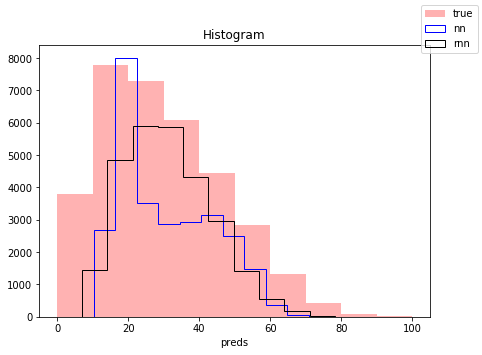

<Figure size 432x288 with 0 Axes>

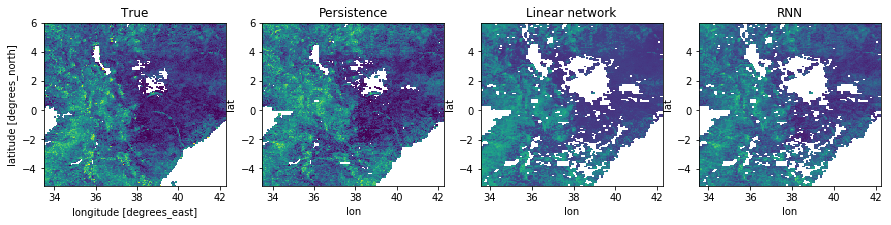

For month 2, parsimonious error: 10.554117123543069, linear net error: 10.5814661838746, rnn error: 8.290107840388945


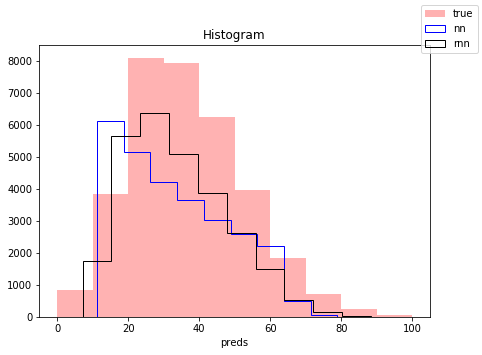

<Figure size 432x288 with 0 Axes>

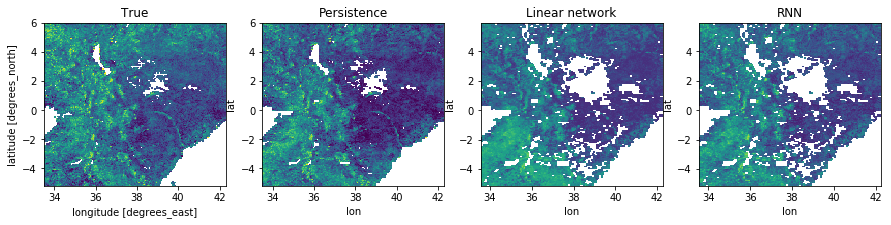

For month 3, parsimonious error: 18.100010155055212, linear net error: 15.67595975541524, rnn error: 12.993128896957163


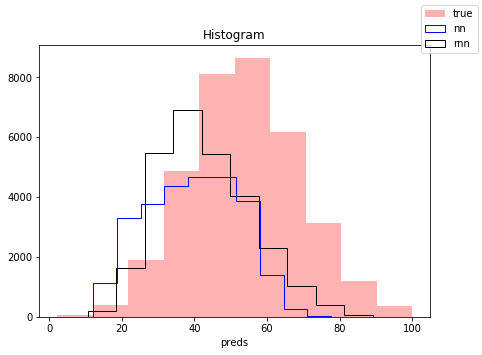

<Figure size 432x288 with 0 Axes>

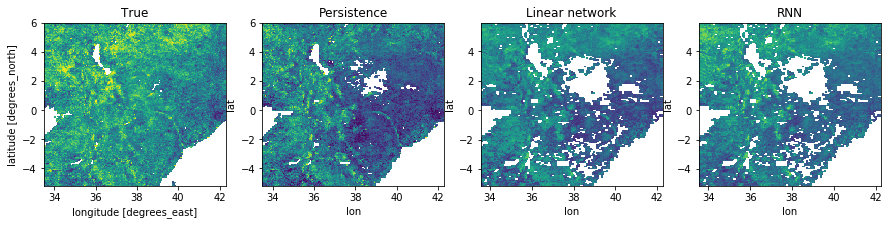

For month 4, parsimonious error: 15.534976936327567, linear net error: 12.159765805350595, rnn error: 9.888241192642292


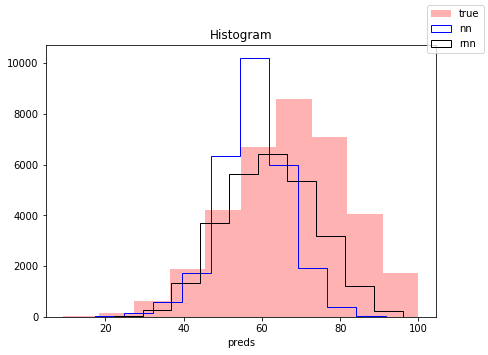

<Figure size 432x288 with 0 Axes>

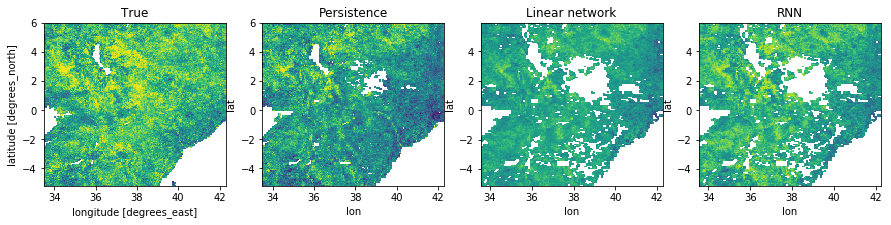

For month 5, parsimonious error: 9.202520535595223, linear net error: 10.993593402995923, rnn error: 8.79345848097126


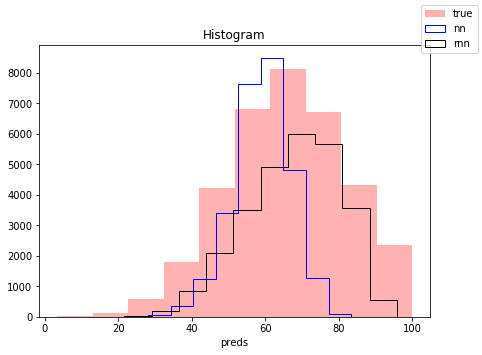

<Figure size 432x288 with 0 Axes>

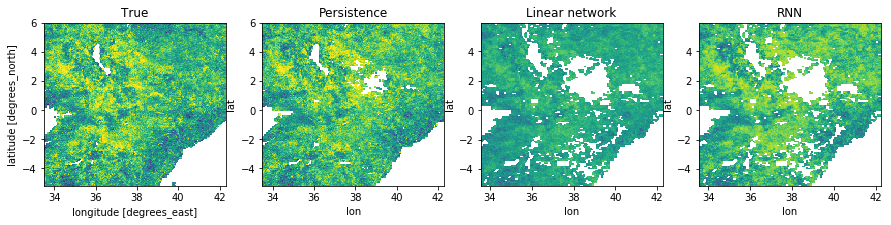

For month 6, parsimonious error: 9.424000468488321, linear net error: 9.252705935958602, rnn error: 7.431787271331328


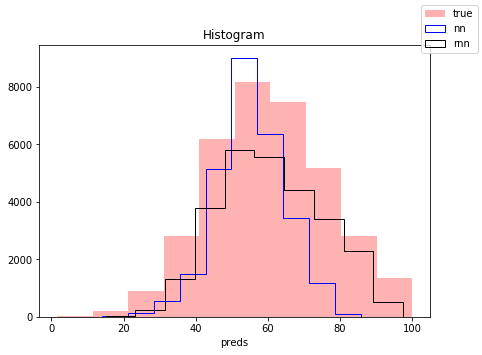

<Figure size 432x288 with 0 Axes>

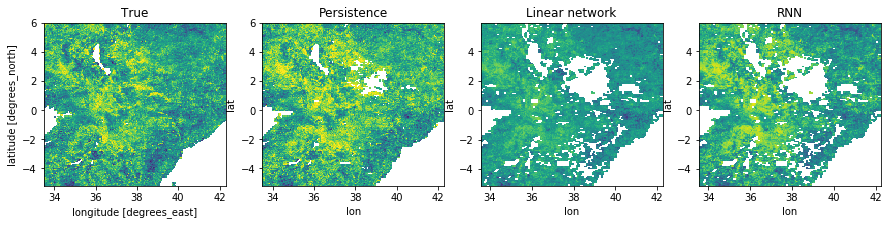

For month 7, parsimonious error: 9.495709830120427, linear net error: 9.889306106617438, rnn error: 8.287430917170305


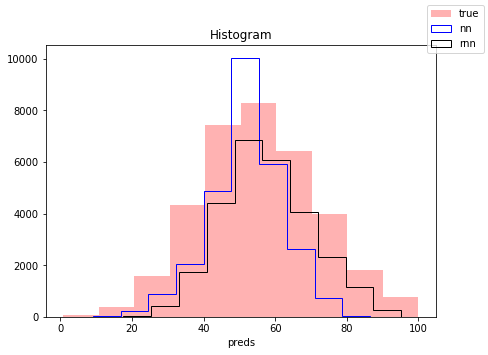

<Figure size 432x288 with 0 Axes>

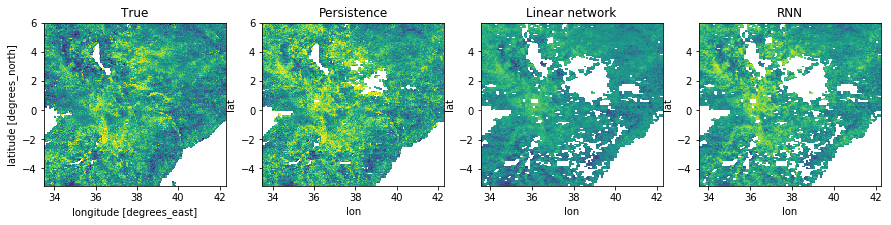

For month 8, parsimonious error: 8.83025866872518, linear net error: 10.748799989273838, rnn error: 7.651781497423066


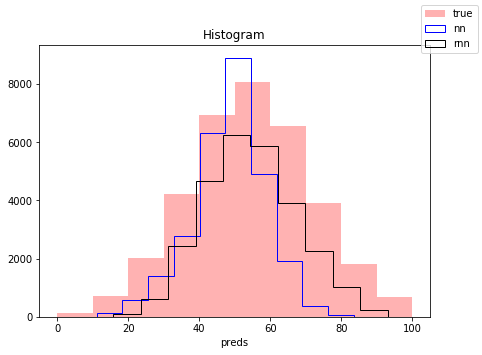

<Figure size 432x288 with 0 Axes>

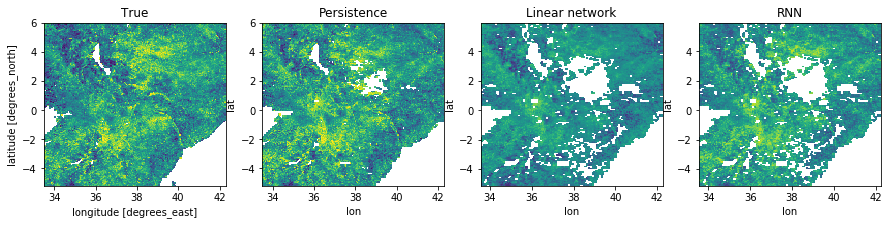

For month 9, parsimonious error: 8.323888489526434, linear net error: 9.239000357752506, rnn error: 7.823047619912085


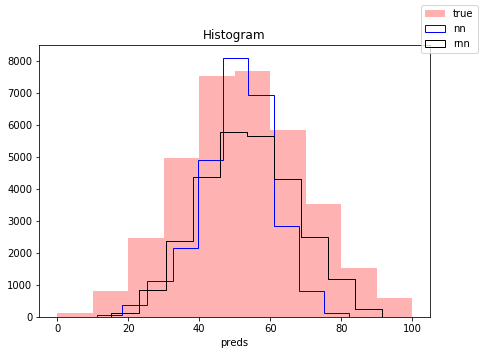

<Figure size 432x288 with 0 Axes>

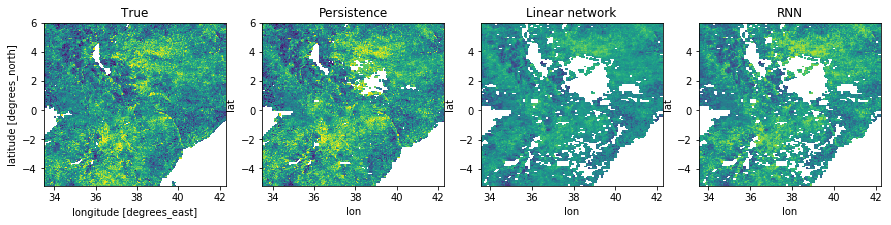

For month 10, parsimonious error: 11.453480168066724, linear net error: 8.245586515409972, rnn error: 8.900670532446265


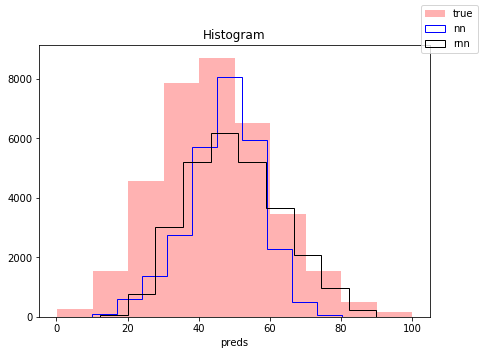

<Figure size 432x288 with 0 Axes>

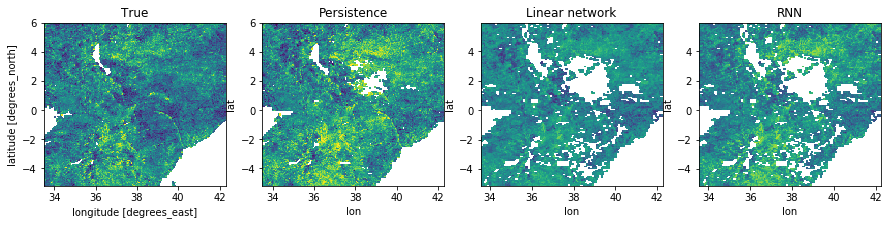

For month 11, parsimonious error: 10.298670093938956, linear net error: 8.381436242218795, rnn error: 9.903175902965849


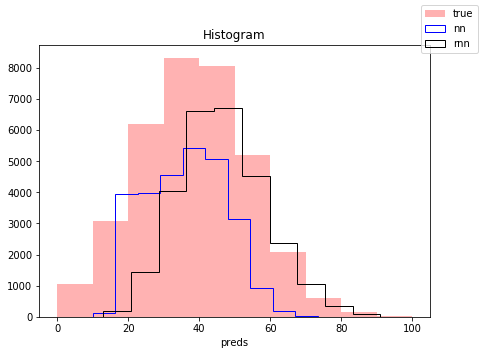

<Figure size 432x288 with 0 Axes>

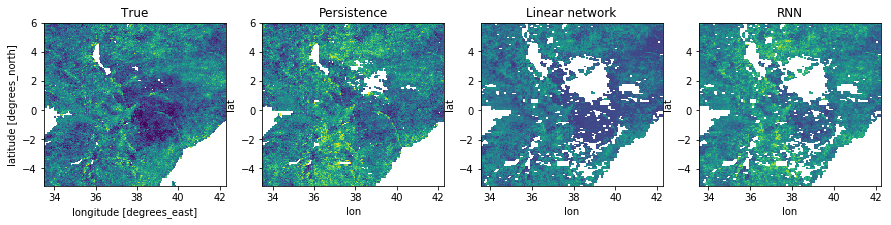

For month 12, parsimonious error: 8.737735137707846, linear net error: 7.277416719055037, rnn error: 7.330027682626415


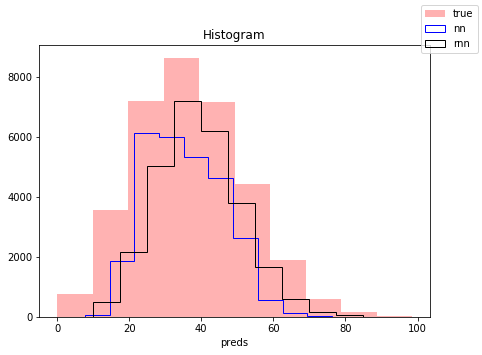

<Figure size 432x288 with 0 Axes>

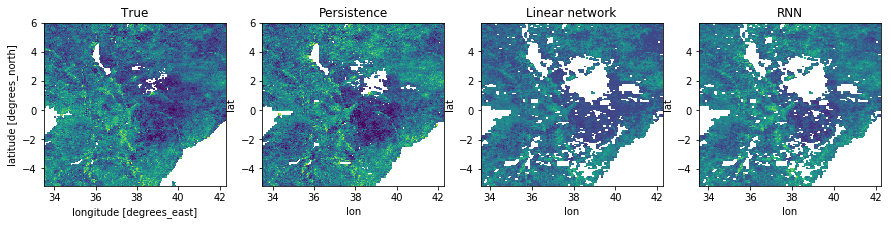

In [4]:
for i in range(1, 13):
    do_the_plots(i)